In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/Datasets/telecom_customer_churn.csv')

In [4]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
df1 = df.copy() #Creating a copy of the dataset

#Exploratory Data Analysis

##Data Preprocessing

###Dropping unwanted columns from the dataset

In [7]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],
         axis='columns',
         inplace=True)


In [8]:
df1.shape

(7043, 31)

In [9]:
df1.dtypes

,0
Gender,object
Age,int64
Married,object
Number of Dependents,int64
City,object
Number of Referrals,int64
Tenure in Months,int64
Offer,object
Phone Service,object
Avg Monthly Long Distance Charges,float64


###Checking the number of unique values in each column

In [10]:
df1.nunique()

,0
Gender,2
Age,62
Married,2
Number of Dependents,10
City,1106
Number of Referrals,12
Tenure in Months,72
Offer,5
Phone Service,2
Avg Monthly Long Distance Charges,3583


###Percentage of null values

In [11]:
df1.isnull().sum()/df1.shape[0]

,0
Gender,0.000000
Age,0.000000
Married,0.000000
Number of Dependents,0.000000
City,0.000000
Number of Referrals,0.000000
Tenure in Months,0.000000
Offer,0.550476
Phone Service,0.000000
Avg Monthly Long Distance Charges,0.096834


###Cleaning Function for the Dataset

In [12]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [13]:
df1=df1.interpolate()

<ipython-input-13-a19307920d3e>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df1.interpolate()


In [14]:
df1=df1.dropna()
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [15]:
df['Unlimited Data']

,Unlimited Data
0,Yes
1,No
2,Yes
3,Yes
4,Yes
...,...
7038,Yes
7039,Yes
7040,Yes
7041,Yes


In [16]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

###Checking the unique values of column having datatype: 'object'

In [17]:
def unique_values_names(df):
  for column in df:
    if df[column].dtype == 'object':
      print(f'{column}:{df[column].unique()}')

In [18]:
unique_values_names(df1)

Gender:['Male' 'Female']
Married:['No' 'Yes']
City:['Costa Mesa' 'Martinez' 'Midpines' 'Lompoc' 'Napa' 'Simi Valley'
 'La Mesa' 'Woodlake' 'San Marcos' 'Alpaugh' 'Moss Beach' 'Stockton'
 'Los Angeles' 'Yermo' 'Fremont' 'El Portal' 'Calistoga' 'North Hollywood'
 'Inverness' 'Modesto' 'Kenwood' 'Morongo Valley' 'Palo Verde' 'Valyermo'
 'Monterey Park' 'Big Oak Flat' 'Glenhaven' 'Lodi' 'Fairfield' 'Moorpark'
 'Solvang' 'Del Rey' 'Armona' 'Mckinleyville' 'Calimesa' 'Garden Grove'
 'Indio' 'San Diego' 'Escondido' 'Chino' 'Calexico' 'Groveland'
 'Los Gatos' 'Clovis' 'Buellton' 'Midway City' 'Folsom' 'San Clemente'
 'Bodega Bay' 'Challenge' 'Ludlow' 'Santa Clara' 'Rescue' 'Lotus'
 'Harbor City' 'Death Valley' 'Riverdale' 'Claremont' 'Upland'
 'Santa Rosa' 'Long Beach' 'Samoa' 'Milford' 'Anderson' 'Orange'
 'San Francisco' 'Santa Cruz' 'Lake Hughes' 'Paramount'
 'San Juan Capistrano' 'Copperopolis' 'Cypress' 'Lancaster' 'San Ysidro'
 'Gilroy' 'San Jose' 'Stanford' 'Turlock' 'Los Alamitos' 'Enc

#Data Visualization

In [19]:
import plotly.express as px
import matplotlib.pyplot as plt

In [20]:
plt.style.use('ggplot')

In [21]:
fig = px.histogram(df1,x='Age')
fig.show()

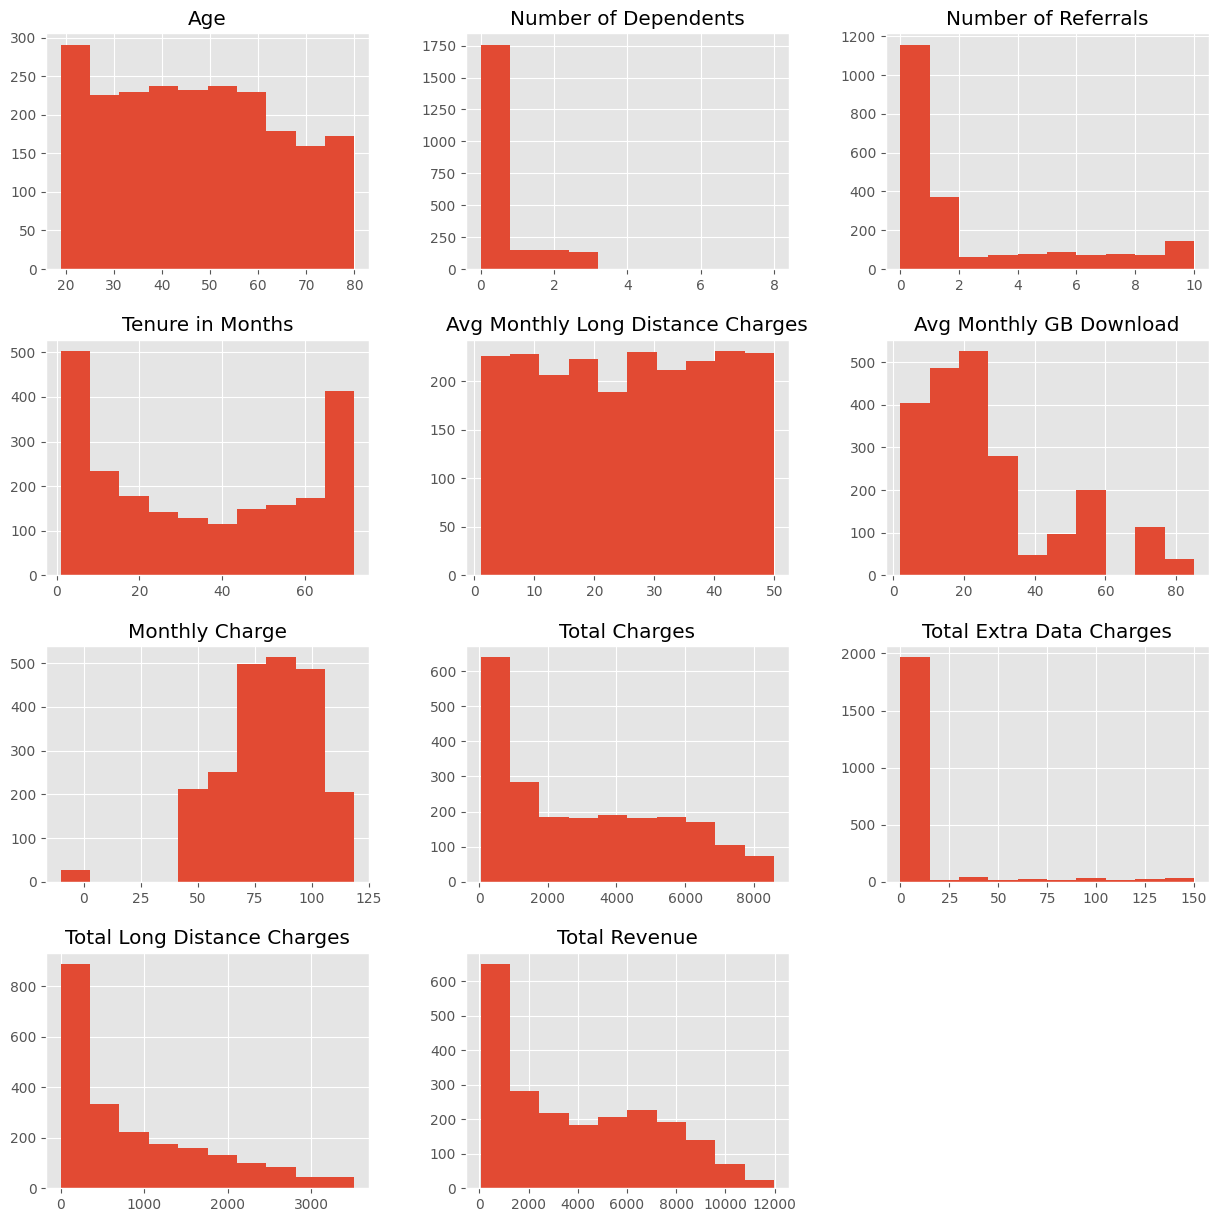

In [22]:
df1.hist(figsize=(15,15))
plt.show()

###Visualizing the number of customers who churned, stayed or joined in the company with a bar plot

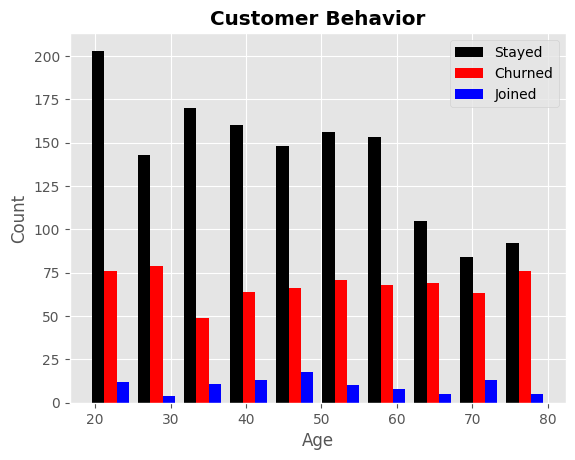

In [23]:
Customer_Stayed = df1[df1['Customer Status'] == 'Stayed'].Age
Customer_Churned = df1[df1['Customer Status'] == 'Churned'].Age
Customer_Joined = df1[df1['Customer Status'] == 'Joined'].Age

plt.xlabel('Age')
plt.ylabel('Count')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined],color=['black','red','blue'],label=['Stayed','Churned','Joined'])
plt.title('Customer Behavior',fontweight='bold')
plt.legend()

In [24]:
import seaborn as sns

##Defining Correlation between the columns in the dataset

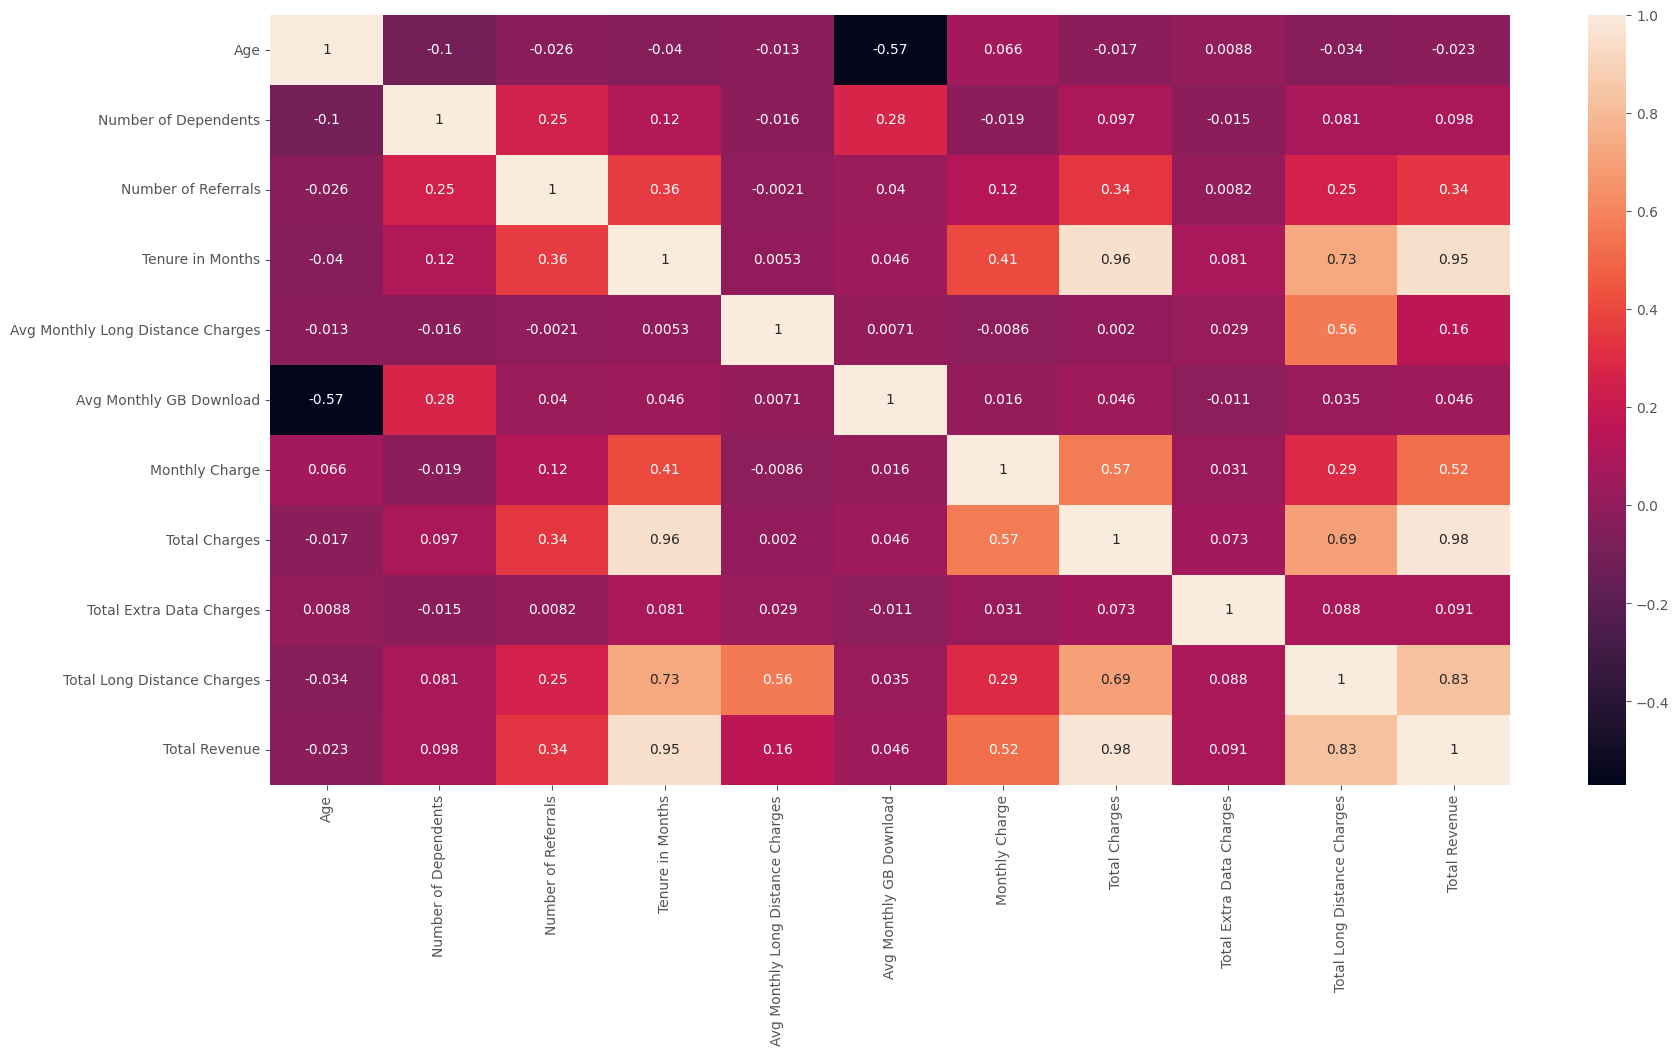

In [29]:
numeric_df = df1.select_dtypes(include=['number'])
data = numeric_df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(data, annot=True)
plt.show()

###Outlier detection on the basis of customer status

In [30]:
number_columns

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Charges',
 'Total Extra Data Charges',
 'Total Long Distance Charges',
 'Total Revenue']

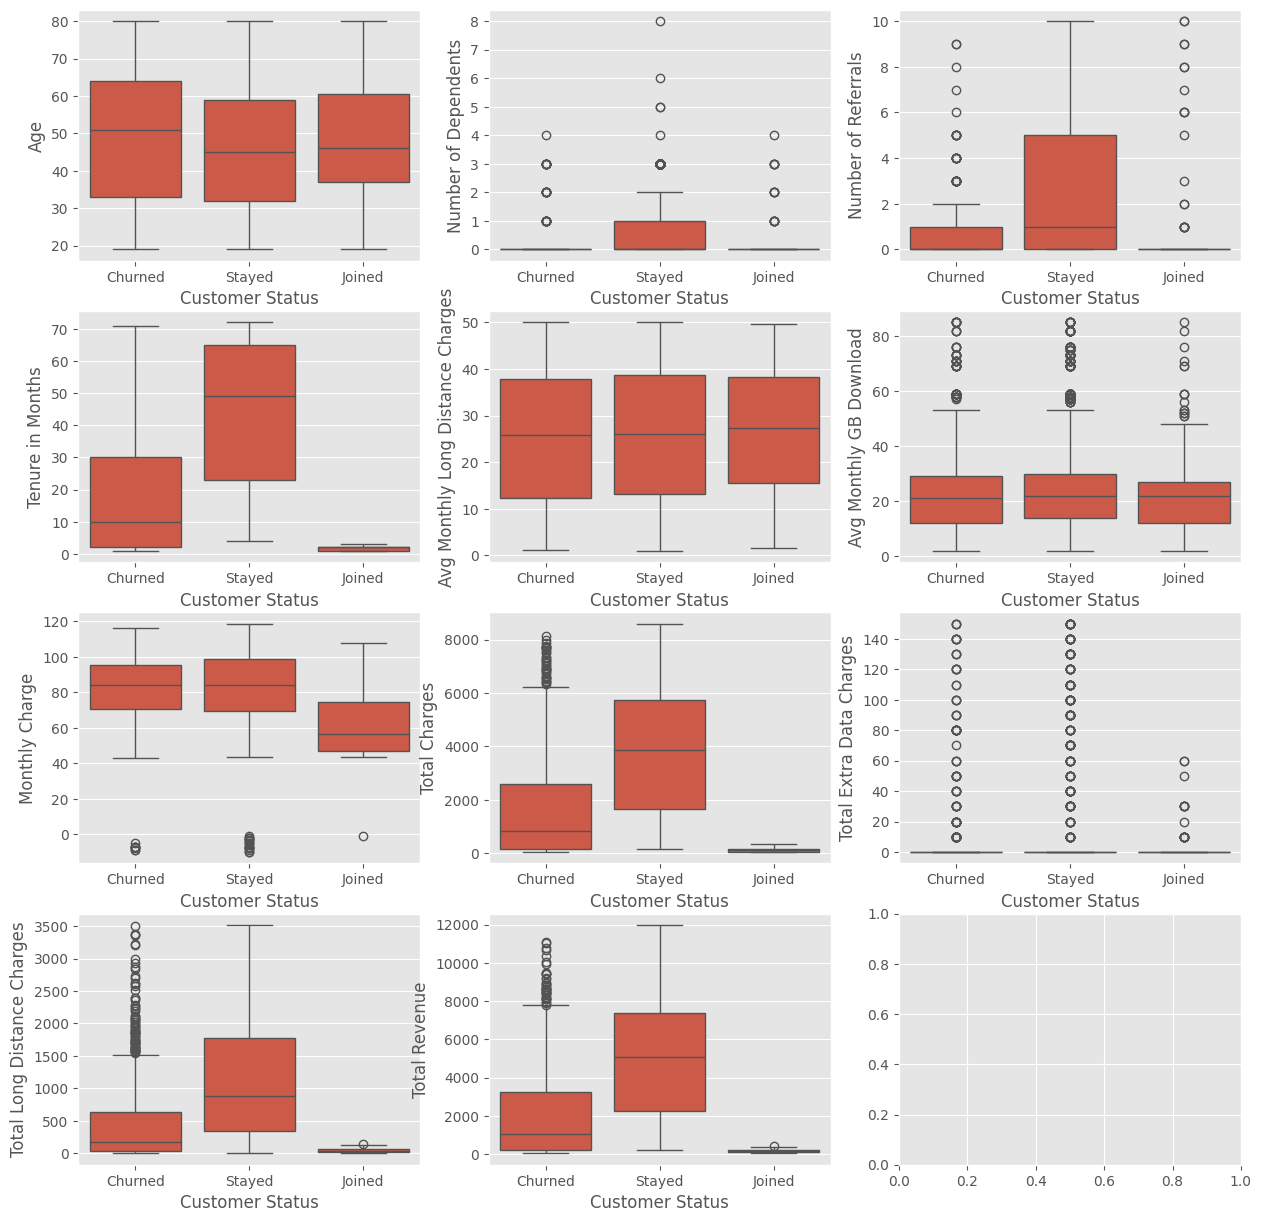

In [31]:
fig, ax = plt.subplots(4,3,figsize=(15,15))
for i, subplot in zip(number_columns,ax.flatten()):
  sns.boxplot(x='Customer Status',y=i,data=df1,ax=subplot)


In [32]:
fig = px.density_heatmap(df1,x='Age',y='Total Charges')
fig.show()

In [33]:
df1.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

<Axes: xlabel='Customer Status'>

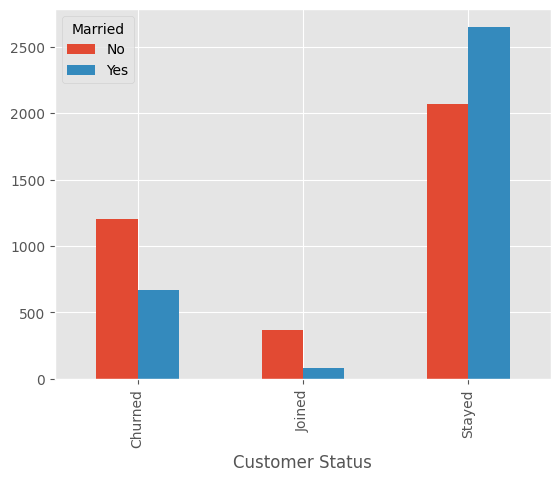

In [34]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

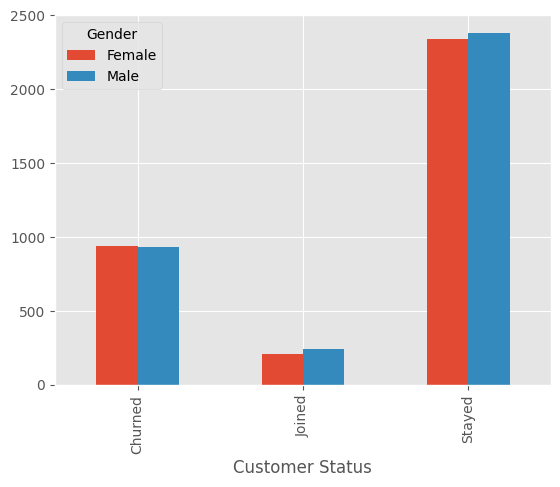

In [35]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

In [36]:
df1['Payment Method'].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

###Create dictionary with role / data key value pairs



In [37]:
df1['Payment Method']

,Payment Method
2,Bank Withdrawal
3,Bank Withdrawal
5,Credit Card
6,Bank Withdrawal
7,Credit Card
...,...
7036,Credit Card
7038,Credit Card
7039,Bank Withdrawal
7040,Credit Card


In [38]:
Roles = {}

for j in df1['Payment Method'].unique():
  Roles[j] = df1[df1['Payment Method'] == j]

In [39]:
Roles.keys()

dict_keys(['Bank Withdrawal', 'Credit Card', 'Mailed Check'])

In [40]:
df1.Offer.value_counts()

,count
Offer,
Offer B,585
Offer E,544
Offer D,392
Offer A,382
Offer C,291


In [41]:
off = df1.Offer.value_counts()

In [42]:
import plotly.graph_objects as go

In [43]:
fig = go.Figure([go.Bar(x=off.index,y=off.values)])
fig.show()

In [44]:
off1 = Roles['Credit Card'].Offer.value_counts()
off1

,count
Offer,
Offer B,204
Offer A,171
Offer E,126
Offer D,119
Offer C,96


In [45]:
fig = go.Figure([go.Bar(x=off1.index,y=off1.values)])
fig.show()

In [46]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

In [47]:
df1['Customer_Status'].unique()

array(['Churned', 'Stayed', 'Joined'], dtype=object)

In [48]:
Roles1 ={}

for i in df1['Customer_Status'].unique():
  Roles1[i] = df1[df1['Customer_Status'] == i]

Roles1.keys()

dict_keys(['Churned', 'Stayed', 'Joined'])

#Data Modelling

###Label encoding gender column

In [49]:
df1.replace({'Gender':{'Female':0,'Male':1}},inplace=True)

###Replacing the columns with 'yes' and 'no' output by Label Encoding

In [50]:
yes_and_no = ['Paperless Billing', 'Unlimited Data',
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']

for i in yes_and_no:
  df1.replace({'No':0,'Yes':1},inplace=True)


###Replacing 'Phone Service' with '1'

In [51]:
df1.replace({'Phone Service':1},inplace=True)

In [52]:
df1.Customer_Status.value_counts()

,count
Customer_Status,
Stayed,1414
Churned,681
Joined,99


In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df1['Customer_Status'])
df1['Customer_Status'] = le.transform(df1['Customer_Status'])

In [54]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])

In [55]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

### Separating the target variable 'Customer_Status'

In [56]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [57]:
X.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2,1,0.508197,0,0.000,0.0,0.042254,1,0.666462,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1,0.967213,1,0.000,0.1,0.169014,1,0.547386,0,1,...,False,False,False,False,False,False,False,False,False,False
5,0,0.065574,0,0.375,0.0,0.112676,1,0.321691,0,1,...,False,False,False,False,False,False,False,False,False,False
6,0,0.786885,1,0.000,0.1,0.985915,1,0.182598,0,1,...,False,False,False,False,False,False,False,False,False,False
7,1,0.540984,1,0.000,0.8,0.873239,1,0.243873,1,1,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y.head()

,Customer_Status
2,0
3,0
5,2
6,2
7,2


#Data Model Building
##Creating Train-Test split

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
len(X_train)

1755

In [61]:
X_train[:10]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2325,1,0.065574,1,0.375,0.1,0.985915,1,0.267974,0,1,...,False,False,False,False,False,False,False,False,False,False
1790,1,0.098361,0,0.000,0.0,0.042254,1,0.420752,0,1,...,False,False,False,False,False,False,False,False,False,False
5966,0,0.360656,0,0.000,0.0,0.873239,1,0.803105,0,1,...,False,False,False,False,False,False,False,False,False,False
5200,1,0.311475,0,0.000,0.0,0.098592,1,0.963644,1,1,...,False,False,False,False,False,False,False,False,False,False
1356,1,0.213115,1,0.375,1.0,0.112676,1,0.885417,0,1,...,False,False,False,False,False,False,False,False,False,False
6158,0,0.032787,1,0.375,1.0,0.985915,1,0.975082,0,1,...,False,False,False,False,False,False,False,False,False,False
6364,0,0.721311,0,0.000,0.0,0.760563,1,0.530637,0,1,...,False,False,False,False,False,False,False,False,False,False
1839,0,0.885246,0,0.000,0.0,0.985915,1,0.680964,1,1,...,False,False,False,False,False,False,False,False,False,False
1049,0,0.245902,1,0.250,0.2,0.845070,1,0.854371,0,1,...,False,False,False,False,False,False,False,False,False,False
6391,0,0.327869,1,0.250,0.5,0.887324,1,0.524510,0,1,...,False,False,False,False,False,False,False,False,False,False


###Importing machine learning models to be applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier





In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [64]:
model_params = {

    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5,0.7,1.0]

        }
    }

}


In [65]:
from sklearn.model_selection import ShuffleSplit

###Calculating scores for different models using Cross Validation

In [66]:
model_params.keys()

dict_keys(['random_forest', 'logistic_regression', 'naive_bayes_gaussian', 'decision_tree', 'XGB_Classifier'])

In [67]:
from sklearn.model_selection import GridSearchCV
scores = []

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=10)

for model_name, mp in model_params.items():
  clf = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
  clf.fit(X,y)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })


df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df



,model,best_score,best_params
0,random_forest,0.797267,{'n_estimators': 10}
1,logistic_regression,0.802733,{'C': 1}
2,naive_bayes_gaussian,0.392711,{}
3,decision_tree,0.786333,{'criterion': 'entropy'}
4,XGB_Classifier,0.820501,{'base_score': 0.5}


XGB_Classifier was conculded to best-performing model for the given dataset

##Selecting the model with the best score in Cross-Validation

In [68]:
reg = XGBClassifier()
reg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [69]:
reg.score(X_test,y_test)

0.8223234624145785

We got an accuracy score of 82.23 percent in the testing dataset



Predicting Values

In [70]:
y_predicted = reg.predict(X_test)

In [71]:
y_predicted[:5]

array([0, 0, 2, 2, 2])

In [72]:
y_test[:5]

,Customer_Status
923,0
4606,0
3642,2
2669,2
6822,2


##Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

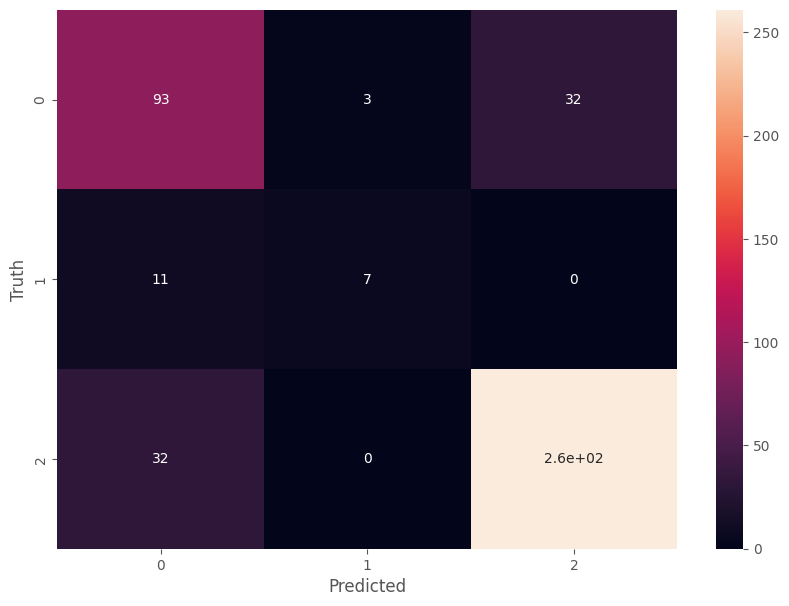

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

##Classification Report

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       128
           1       0.70      0.39      0.50        18
           2       0.89      0.89      0.89       293

    accuracy                           0.82       439
   macro avg       0.76      0.67      0.70       439
weighted avg       0.82      0.82      0.82       439



In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.8223234624145785

In the end, we conclude that Telecom Customer Churn Prediction worked best with XGB_Classifier, achieving an accuracy score of 82.23%."